# Señales

<div class="alert alert-block alert-warning">
Este Jupyter notebook es parte de una colección de apuntes para el curso IEE2103 Señales y Sistemas, Departamento de Ingeniería Eléctrica, Pontificia Universidad Católica de Chile. 
</div>

Consultas y comentarios: [rcadiz@ing.puc.cl](mailto:rcadiz@ing.puc.cl)

***

## Concepto de señal

- Contiene información
- Función de una variable independiente (x,t)
- La forma en que evoluciona en la variable independiente codifica la información


**Ejemplos:**

- Voltaje o corriente en un circuito electrónico
- Voz o música
- Imágenes
- Señales bioeléctricas (EEG)
- Variación de la bolsa (IPSA)

### Tipos de señales

Las señales pueden clasificarse de varias formas:
- Continuas vs discretas
- De energía o de potencia



**Ejemplo**

En el siguiente código se pueden observar dos señales, una discreta y otra continua, que tienen la misma forma. Sin embargo, mientras la versión continua posee un valor para cada valor de la variable independiente, la señal discreta sólo está definida en ciertos lugares de la variable independiente. Las funciones son

- $x[n] = (1/2)^n$
- $x(t) = (1/2)^t$

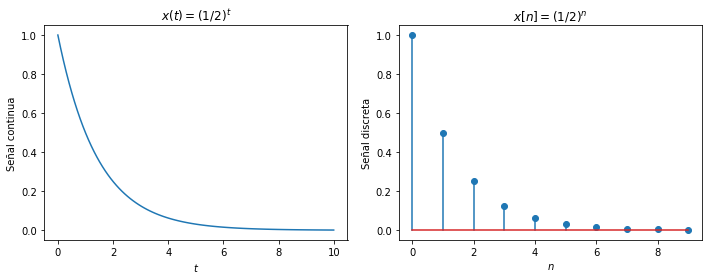

In [27]:
# Ejemplo de señales continuas y discretas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = np.arange(10)
t = np.linspace(0,10,100)

def continuous_signal(a,t):
    return np.power(a,t)

def discrete_signal(a,n):
    return np.power(a,n)

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(t, continuous_signal(0.5,t))
plt.xlabel('$t$')
plt.ylabel('Señal continua')
plt.title('$x(t) = (1/2)^t$')

plt.subplot(122)
plt.stem(n, discrete_signal(0.5,n))
plt.xlabel('$n$')
plt.ylabel('Señal discreta')
plt.title('$x[n] = (1/2)^n$')

plt.tight_layout()
    

Algo más pasa con los sistemas.

### Linealidad


La linealidad blabla 

**Ejemplo**



### Invarianza

La invarianza, blabla

### Memoria

Memoria blabla


**Copyright**

Estos apuntes están licensiados bajo la licencia [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/). Como citar: *Rodrigo F. Cádiz, Apuntes de Señales y Sistemas.*